# House Price: Ames to Apply

## I. Imports

In [1]:
# Typical Imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Collate training and validation datasets, for visualization and processing purposes
raw_df = pd.concat([pd.read_csv("data/train.csv"), pd.read_csv("data/test.csv")], axis=0).drop_duplicates()
raw_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## II. Data Cleaning and Feature Engineering

### A. Numerical Features

In [4]:
# Select numerical features
num_cols = raw_df.select_dtypes(["int64", "float64"]).columns.tolist()
num_cols.remove("MSSubClass")

num_df = raw_df[num_cols]
num_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [5]:
raw_df.shape

(2919, 81)

In [6]:
# Fetch numerical features with null (missing) values, display.
incomplete_num_cols = [x for x in num_cols if raw_df[x].isnull().any()]
incomplete_num_cols.remove("SalePrice")

sparse_num_df = raw_df[incomplete_num_cols]
sparse_num_df.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0


In [7]:
raw_df["BsmtHalfBath"].unique()

array([ 0.,  1.,  2., nan])

In [8]:
descStr = "{:02d} {}: {:.2f}%"
for i, l in enumerate(incomplete_num_cols):
    pctFull = 100 * len(raw_df[l].dropna()) / 2919
    print(descStr.format(i, l, pctFull))

00 LotFrontage: 83.35%
01 MasVnrArea: 99.21%
02 BsmtFinSF1: 99.97%
03 BsmtFinSF2: 99.97%
04 BsmtUnfSF: 99.97%
05 TotalBsmtSF: 99.97%
06 BsmtFullBath: 99.93%
07 BsmtHalfBath: 99.93%
08 GarageYrBlt: 94.55%
09 GarageCars: 99.97%
10 GarageArea: 99.97%


From the above, we can see that among our incomplete numerical features, most are very nearly so (>99%). With exception, are ```LotFrontage``` (83.35%) and our label, ```SalesPrice``` (50.02%). For the other attributes listed above, we can use imputation to fill in the ranks.

In [9]:
sparse_num_df.describe().T[["mean", "std"]]

,mean,std
LotFrontage,69.305795,23.344905
MasVnrArea,102.201312,179.334253
BsmtFinSF1,441.423235,455.610826
BsmtFinSF2,49.582248,169.205611
BsmtUnfSF,560.772104,439.543659
TotalBsmtSF,1051.777587,440.766258
BsmtFullBath,0.429894,0.524736
BsmtHalfBath,0.061364,0.245687
GarageYrBlt,1978.113406,25.574285
GarageCars,1.766621,0.761624


In [10]:
sns.set(style="whitegrid", palette=sns.color_palette("mako"))

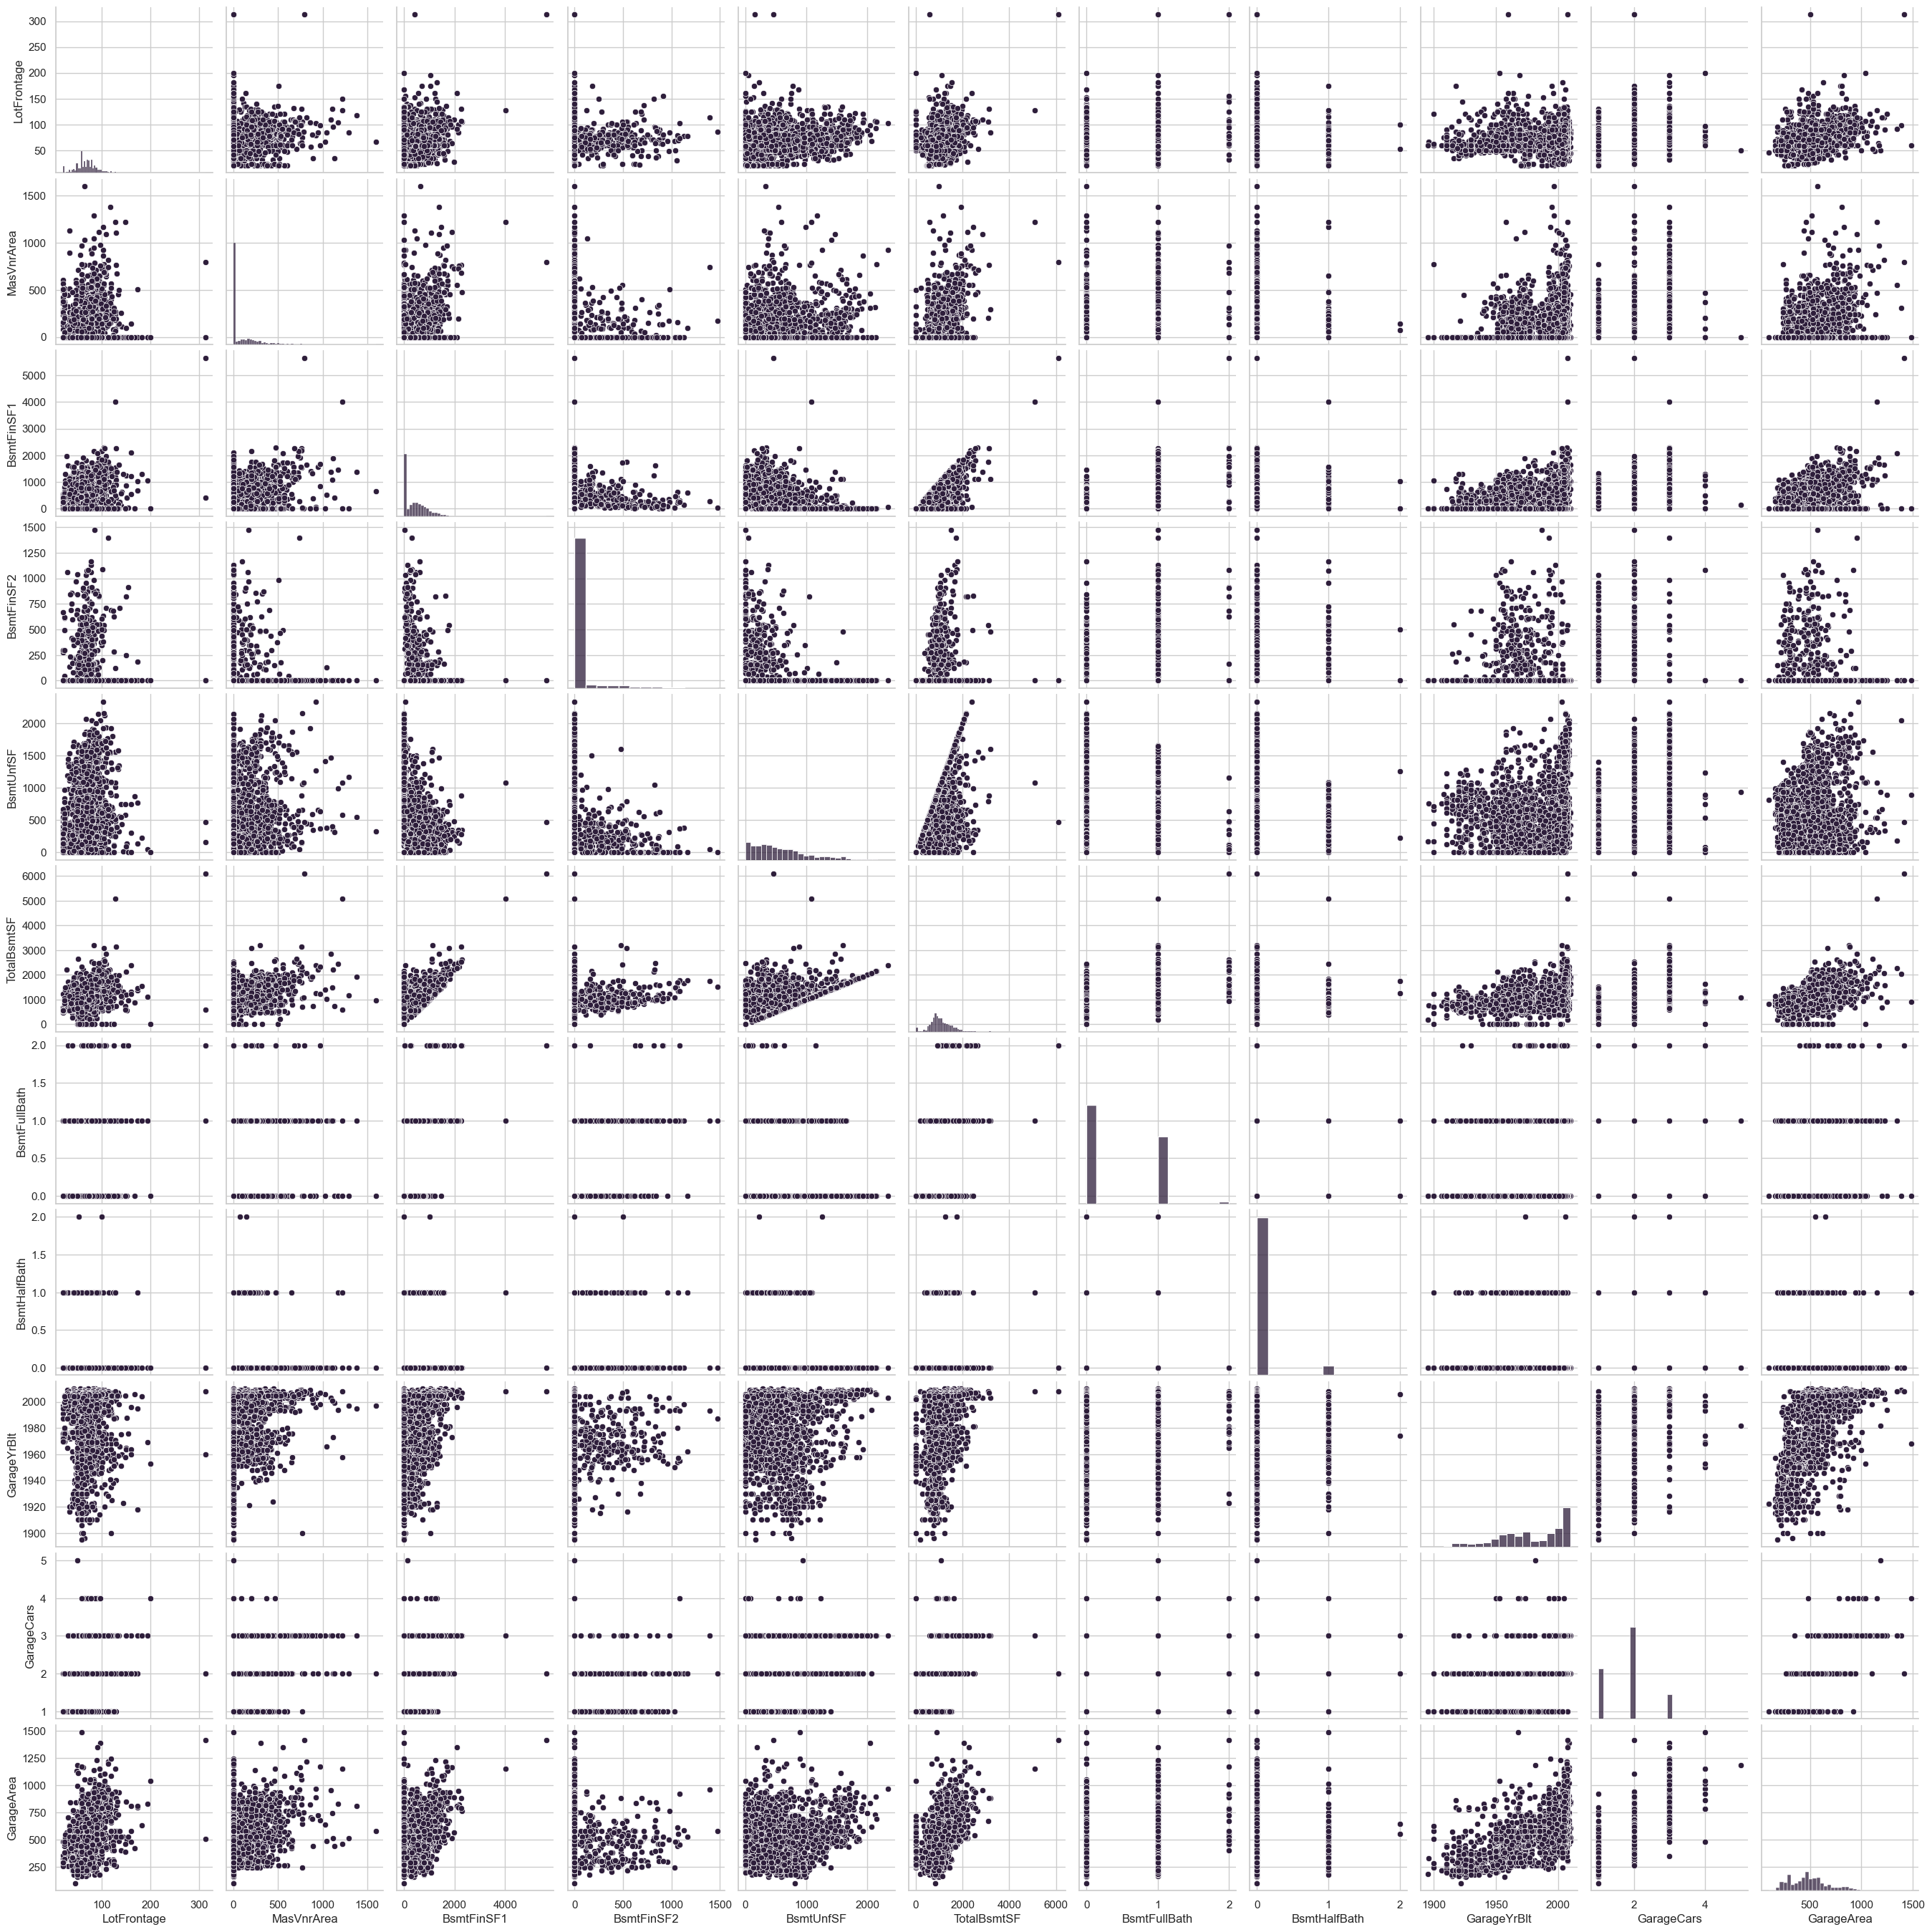

In [11]:
sns.pairplot(sparse_num_df.dropna())
plt.show()

In [12]:
sparse_num_df.columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [13]:
mean_impute_cols = ["LotFrontage", "BsmtUnfSF", "TotalBsmtSF", "GarageYrBlt", "GarageArea"]
mode_impute_cols = [label for label in sparse_num_df.columns.tolist() if label not in mean_impute_cols]
mode_impute_cols

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars']

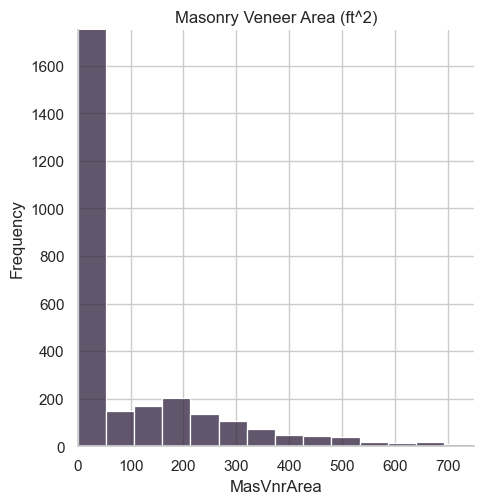

In [14]:
sns.displot(data=raw_df["MasVnrArea"].dropna(), bins=30)
plt.xlim(0, 750), plt.ylim(0, 1750), plt.ylabel("Frequency"), plt.title("Masonry Veneer Area (ft^2)")
plt.show()

In [15]:
raw_df["MasVnrArea"].value_counts().head()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
Name: MasVnrArea, dtype: int64

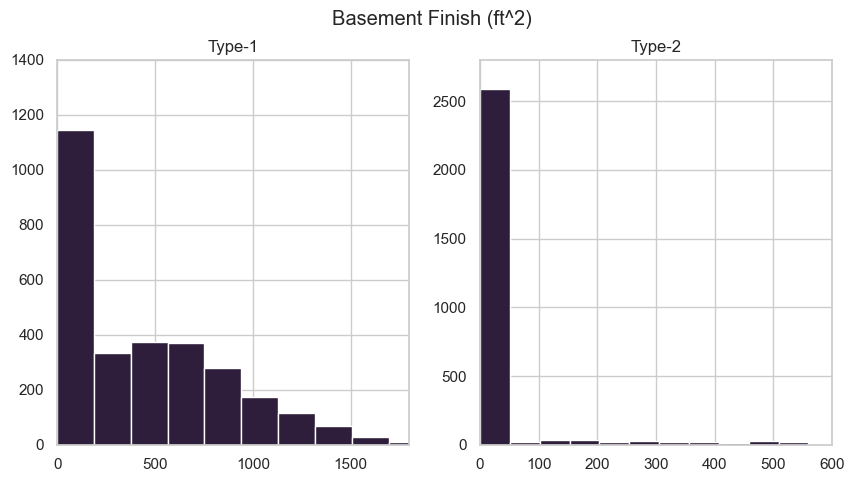

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(x=raw_df["BsmtFinSF1"].dropna(), bins=30)
ax1.set_xlim(0, 1800), ax1.set_ylim(0, 1400), ax1.set_title("Type-1")

ax2.hist(x=raw_df["BsmtFinSF2"].dropna(), bins=30)
ax2.set_xlim(0, 600), ax2.set_ylim(0, 2800), ax2.set_title("Type-2")

fig.suptitle("Basement Finish (ft^2)")
plt.show()

In [17]:
raw_df["BsmtFinSF1"].value_counts().head()

0.0      929
24.0      27
16.0      14
300.0      9
288.0      8
Name: BsmtFinSF1, dtype: int64

In [18]:
raw_df["BsmtFinSF2"].value_counts().head()

0.0      2571
180.0       5
294.0       5
435.0       3
483.0       3
Name: BsmtFinSF2, dtype: int64

From the ```value_counts()```, we can see that the mode (0) is disproportionately prevalent among entries in regard to the Masonry Veneer Area (```MasVnrArea```), as well as Basement Finish Areas (```BsmtFinSF1``` and ```BsmtFinSF2```). This reinforces our suspicion that the mode is a more appropriate imputation measure.

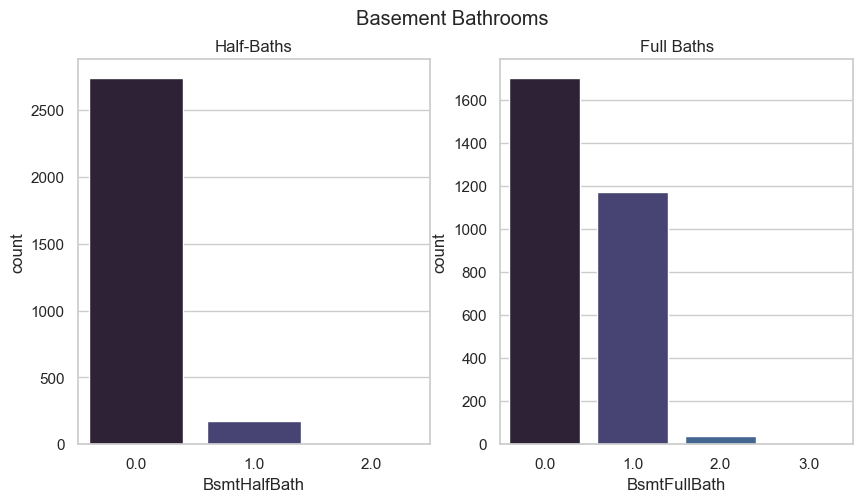

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=raw_df, x="BsmtHalfBath", ax=ax1)
ax1.set_title("Half-Baths")

sns.countplot(data=raw_df, x="BsmtFullBath", ax=ax2)
ax2.set_title("Full Baths")

fig.suptitle("Basement Bathrooms")
plt.show()

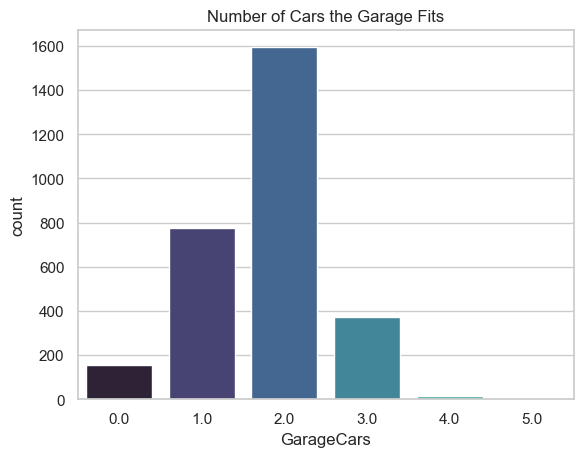

In [20]:
sns.countplot(data=raw_df, x="GarageCars")
plt.title("Number of Cars the Garage Fits")
plt.show()

In [21]:
num_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [22]:
# Reminders
print("Mean:", mean_impute_cols)
print("Mode: ", mode_impute_cols)

Mean: ['LotFrontage', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageArea']
Mode:  ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars']


In [23]:
df1 = raw_df.copy()

In [24]:
# Perform numerical imputation, confirm data density
for l1 in mean_impute_cols:
    num_df[l1] = df1[l1].fillna(raw_df[l1].dropna().mean())
for l2 in mode_impute_cols:
    num_df[l2] = df1[l2].fillna(raw_df[l2].dropna().mode())

num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   YearBuilt      2919 non-null   int64  
 6   YearRemodAdd   2919 non-null   int64  
 7   MasVnrArea     2896 non-null   float64
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtUnfSF      2919 non-null   float64
 11  TotalBsmtSF    2919 non-null   float64
 12  1stFlrSF       2919 non-null   int64  
 13  2ndFlrSF       2919 non-null   int64  
 14  LowQualFinSF   2919 non-null   int64  
 15  GrLivArea      2919 non-null   int64  
 16  BsmtFullBath   2917 non-null   float64
 17  BsmtHalfBath   2917 non-null   float64
 18  FullBath

Unfortunately, since we're seeking to predict (estimate) the ```SalePrice``` target label, it would be inappropriate to impute missing values here. This carries even more so, since it's 50% sparse. So, when we get ready to build models, we'll be working with an absolute maximum of 1460 entries. Of course, not all of these will be used for training alone.

### B. Categorical Features

In [25]:
cat_cols = raw_df.select_dtypes("object").columns.tolist()
cat_cols.append("MSSubClass")

raw_df[cat_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,70
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60


#### 1. Ordinal Encoding

In [26]:
# Define categorical columns with intuitive ordination. Bin according to unique values.
ord_cols = ['Street', 'Alley', 'PavedDrive', 'GarageFinish', 'GarageQual', 'GarageCond',
                       'Utilities', 'LandSlope', 'Fence', 'ExterQual', 'ExterCond', 'PoolQC',
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu']

non_qual_cols = ['Street', 'Alley', 'PavedDrive', 'GarageFinish', 'Utilities',
                          'LandSlope', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Fence']

qual_cols = [x for x in ord_cols if x not in non_qual_cols]
qual_cols

['GarageQual',
 'GarageCond',
 'ExterQual',
 'ExterCond',
 'PoolQC',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu']

In [27]:
# Define ordinal schema.
standard_quality = {np.nan: 0, 'Po': 1, 'No': 1, 'Fa': 2, 'Mn': 2,'TA': 3, 'Av': 3, 'Gd': 4, 'Ex': 5}
fence_quality = {np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
basement_finishing_states = {np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
garage_finishing_states = {np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
slope_quality = {'Gtl': 1, 'Mod': 2, 'Sev': 3}
pavings = {np.nan: 0, 'N': 0, 'P': 1, 'Grvl': 1, 'Y': 2, 'Pave': 2}
utils = {np.nan: 0, 'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}
bls = {'N': 0, 'Y': 1}

In [28]:
# Perform ordinal encoding, store in ord_df.
ord_df = pd.DataFrame()

for q in qual_cols:
    ord_df[q] = raw_df[q].apply(lambda x: standard_quality[x]).astype("int64")
for p in ['Street', 'Alley', 'PavedDrive']:
    ord_df[p] = raw_df[p].apply(lambda x: pavings[x]).astype("int64")
for b in ['BsmtFinType1', 'BsmtFinType2']:
    ord_df[b] = raw_df[b].apply(lambda x: basement_finishing_states[x]).astype("int64")

ord_df["Utilities"] = raw_df["Utilities"].apply(lambda x: utils[x]).astype("int64")
ord_df["LandSlope"] = raw_df["LandSlope"].apply(lambda x: slope_quality[x]).astype("int64")
ord_df["GarageFinish"] = raw_df["GarageFinish"].apply(lambda x: garage_finishing_states[x]).astype("int64")
ord_df["CentralAir"] = raw_df["CentralAir"].apply(lambda x: bls[x]).astype("int64")
ord_df["Fence"] = raw_df["Fence"].apply(lambda x: fence_quality[x]).astype("int64")

ord_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GarageQual    2919 non-null   int64
 1   GarageCond    2919 non-null   int64
 2   ExterQual     2919 non-null   int64
 3   ExterCond     2919 non-null   int64
 4   PoolQC        2919 non-null   int64
 5   BsmtQual      2919 non-null   int64
 6   BsmtCond      2919 non-null   int64
 7   BsmtExposure  2919 non-null   int64
 8   HeatingQC     2919 non-null   int64
 9   KitchenQual   2919 non-null   int64
 10  FireplaceQu   2919 non-null   int64
 11  Street        2919 non-null   int64
 12  Alley         2919 non-null   int64
 13  PavedDrive    2919 non-null   int64
 14  BsmtFinType1  2919 non-null   int64
 15  BsmtFinType2  2919 non-null   int64
 16  Utilities     2919 non-null   int64
 17  LandSlope     2919 non-null   int64
 18  GarageFinish  2919 non-null   int64
 19  CentralAir    2919 non-null

#### 2. Nominal Features

After ordinal encoding, we're left with a few categorical features that do not have clear meaning.

In [29]:
nominal_cat_cols = [x for x in raw_df.columns if x not in num_cols + ord_cols]
nominal_df = raw_df[nominal_cat_cols]

dwelling_types = {20: '1F_Y>=1946', 30: '1F_Y<=1945', 40: '1F_Finished Attic',
                  45: '1.5F_Y>=1946 Unfinished', 50: '1.5F_Finished', 60: '2F_Y>=1946',
                  70: '2F_Y<=1945', 75: '2.5F', 80: 'Split/Multilevel',
                  85: 'SplitFoyer', 90: 'Duplex', 120: '1F_PUD(Y>=1946)',
                  150: '1.5F_PUD', 160: '2F_PUD(Y>=1946)', 180: 'Split/Multilevel_PUD',
                  190: '2FamConver'}
nominal_df["MSSubClass"] = df1["MSSubClass"].apply(lambda x: dwelling_types[x])

nominal_df.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,MiscFeature,SaleType,SaleCondition
0,2F_Y>=1946,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,NaN,WD,Normal
1,1F_Y>=1946,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,...,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,NaN,WD,Normal
2,2F_Y>=1946,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,NaN,WD,Normal
3,2F_Y<=1945,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,...,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,NaN,WD,Abnorml
4,2F_Y>=1946,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,NaN,WD,Normal


In [30]:
len(nominal_cat_cols) + len(ord_df.columns) == len(cat_cols)

True

### C. Putting it All Together

In [31]:
dummy_df = pd.get_dummies(nominal_df)
df = pd.concat([num_df, ord_df, dummy_df], axis=1).dropna().drop("Id", axis=1)
df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,953.0,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,589.0,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,877.0,...,0,0,0,1,0,0,0,0,1,0
1458,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## III. EDA & Extended DataViz

### A. The SalePrice Label

In [32]:
df.columns.tolist()

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'GarageQual',
 'GarageCond',
 'ExterQual',
 'ExterCond',
 'PoolQC',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'Street',
 'Alley',
 'PavedDrive',
 'BsmtFinType1',
 'BsmtFinType2',
 'Utilities',
 'LandSlope',
 'GarageFinish',
 'CentralAir',
 'Fence',
 'MSSubClass_1.5F_Finished',
 'MSSubClass_1.5F_PUD',
 'MSSubClass_1.5F_Y>=1946 Unfinished',
 'MSSubClass_1F_Finished Attic',
 'MSSubClass_1F_PUD(Y>=1946)',
 'MSSubClas

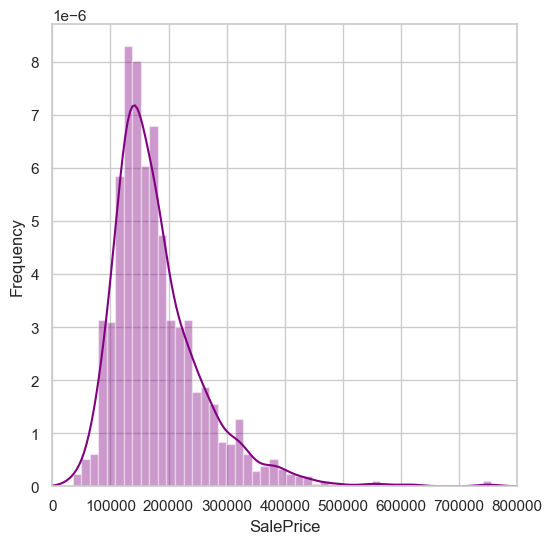

In [33]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df['SalePrice'], ax=ax, color='purple')
plt.xlim(0, 800000), plt.ylabel('Frequency')
plt.show()

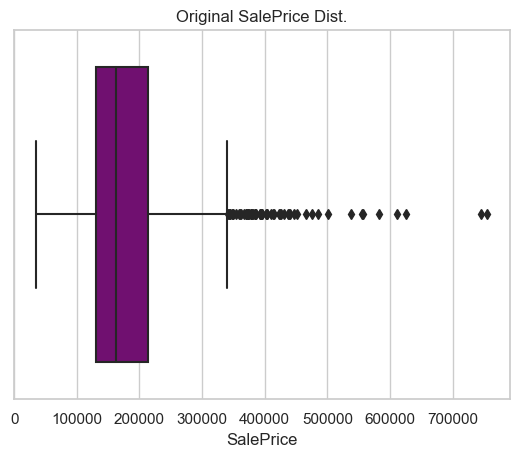

In [34]:
sns.boxplot(x=df['SalePrice'], color="purple")
plt.title('Original SalePrice Dist.')
plt.show()

In [35]:
stats.skew(df["SalePrice"].values)

1.8820976302982688

Our target label is showing significant skew, meaning it can not be normal. Let's try a quick ```ln``` transformation:

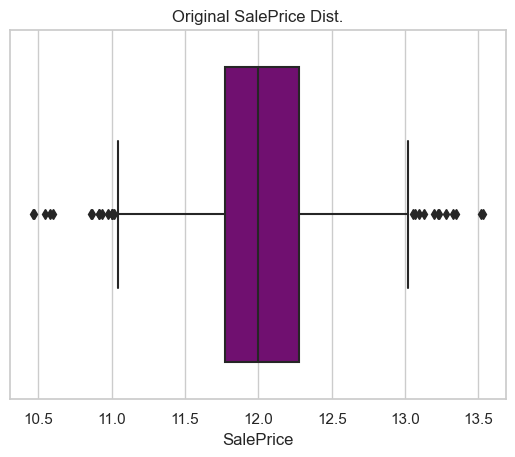

In [36]:
sns.boxplot(x=np.log(df['SalePrice']), color="purple")
plt.title('Original SalePrice Dist.')
plt.show()

In [37]:
stats.skew(np.log(df["SalePrice"]))

0.12182139410708079

Good! We've reduced the skew.

### B. Feature Correlation

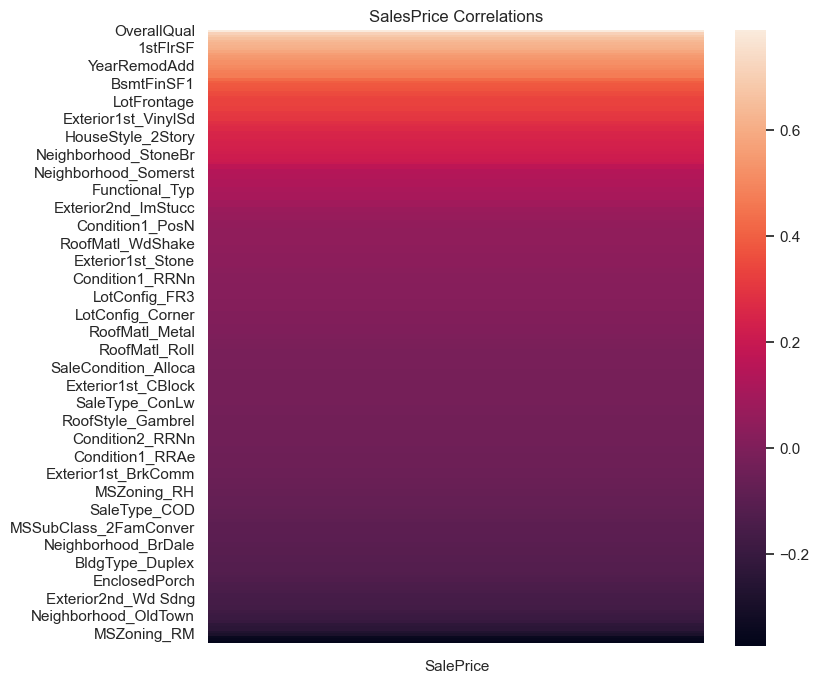

In [38]:
sales_correlations = df.corr()['SalePrice'].to_frame().sort_values(by='SalePrice', ascending=False)[1:]
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=sales_correlations, ax=ax)
plt.title("SalesPrice Correlations")
plt.show()

In [39]:
sales_correlations.head()

,SalePrice
OverallQual,0.789997
GrLivArea,0.710080
ExterQual,0.681161
KitchenQual,0.658432
GarageCars,0.639686


In [40]:
sales_correlations.tail()

,SalePrice
MSZoning_RM,-0.287947
Foundation_CBlock,-0.342221
GarageType_Detchd,-0.353844
MasVnrType_None,-0.373072
MSSubClass_1.5F_PUD,NaN


### C. Potentially Redundant Features

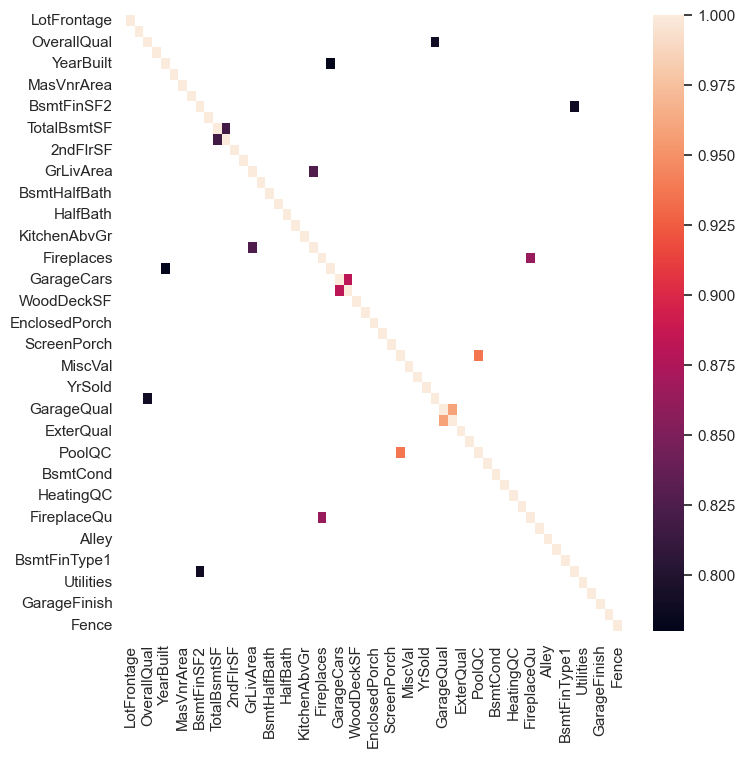

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
nonbin_corrs = df.select_dtypes(["int64", "float64"]).corr()
sns.heatmap(data=nonbin_corrs[abs(nonbin_corrs) >= 0.75], ax=ax)
plt.show()

In [42]:
nonbin_corrs[abs(nonbin_corrs) >= 0.8]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Street,Alley,PavedDrive,BsmtFinType1,BsmtFinType2,Utilities,LandSlope,GarageFinish,CentralAir,Fence
LotFrontage,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
nonbin_corrs["ExterQual"].abs().sort_values(ascending=False)

ExterQual        1.000000
OverallQual      0.724839
KitchenQual      0.715184
SalePrice        0.681161
YearBuilt        0.596514
YearRemodAdd     0.586036
GarageYrBlt      0.565592
BsmtQual         0.564171
GarageCars       0.525070
HeatingQC        0.519331
GarageFinish     0.516546
GarageArea       0.494497
FullBath         0.482929
TotalBsmtSF      0.468422
GrLivArea        0.435366
1stFlrSF         0.396122
FireplaceQu      0.363524
MasVnrArea       0.351524
TotRmsAbvGrd     0.299468
OpenPorchSF      0.287195
BsmtUnfSF        0.286147
Fireplaces       0.249886
BsmtExposure     0.249808
Fence            0.231950
BsmtFinType1     0.224477
GarageQual       0.218399
GarageCond       0.214011
PavedDrive       0.210979
WoodDeckSF       0.209828
CentralAir       0.205408
BsmtFinSF1       0.199389
HalfBath         0.191264
BsmtCond         0.181959
2ndFlrSF         0.181901
LotFrontage      0.163905
KitchenAbvGr     0.154890
EnclosedPorch    0.150742
OverallCond      0.135729
BsmtFullBath

From the above heatmap, we note severe multi-collinearity among the following features:
* ```TotalBsmtSF```, ```1stFlrSF``` - 0.815246
* ```GrLivArea```, ```TotRmsAbvGr``` - 0.825476
* ```Fireplaces```, ```FireplaceQu``` - 0.864047
* ```PoolArea```, ```PoolQC``` - 0.937055
* ```GarageQual```, ```GarageCond``` - 0.959156
* ```GarageArea```, ```GarageCars``` - 0.882332

Now, we could perform Graham-Schmidt. This would turn our interdependent features into a set of orthogonal (independent) vectors, thus solving the multi-collinearity violation to the assumption of classical linear regression models. However, it would reduce interpretability. Instead, we'll be examining the pairs herein listed, and dropping the label which is least correlated with our target variable.

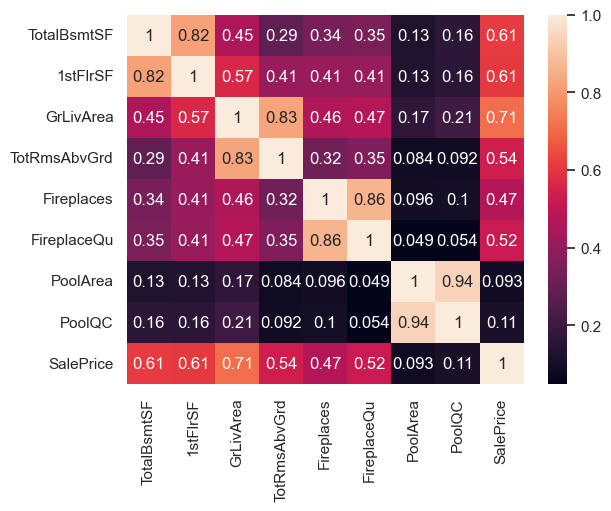

In [44]:
attr_corr = df[["TotalBsmtSF", "1stFlrSF", "GrLivArea", "TotRmsAbvGrd", "Fireplaces", "FireplaceQu", "PoolArea", "PoolQC", "SalePrice"]].corr()
sns.heatmap(data=attr_corr, annot=True)
plt.show()

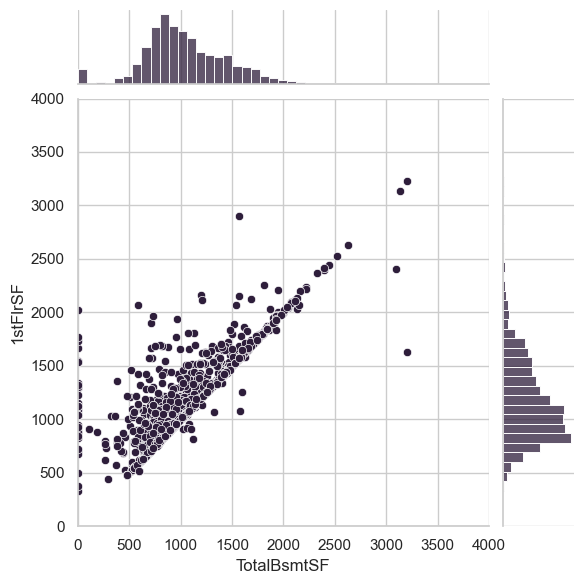

In [45]:
sns.jointplot(data=df, x="TotalBsmtSF", y="1stFlrSF", xlim=[0, 4000], ylim=[0, 4000])
plt.show()

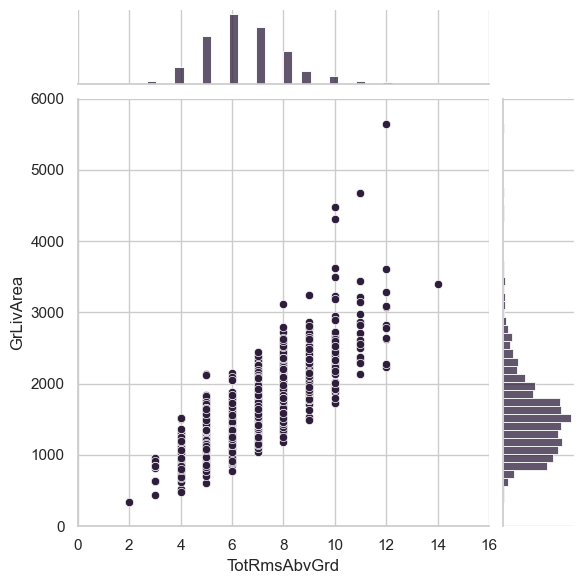

In [46]:
sns.jointplot(data=df, x="TotRmsAbvGrd", y="GrLivArea", xlim=[0, 16], ylim=[0, 6000])
plt.show()

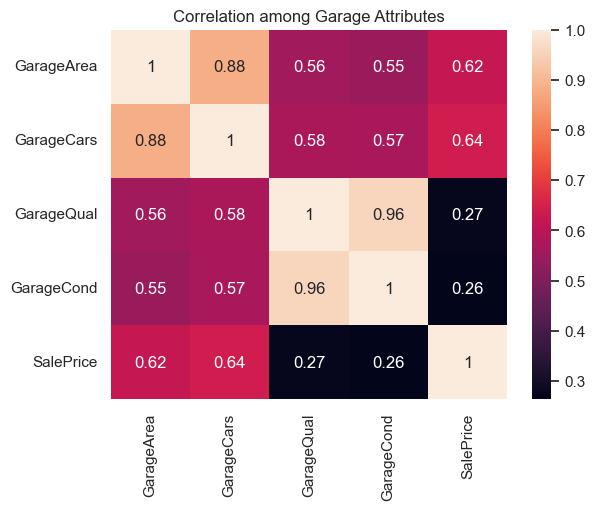

In [47]:
garage_corr = df[["GarageArea", "GarageCars", "GarageQual", "GarageCond", "SalePrice"]].corr()
sns.heatmap(data=garage_corr, annot=True)
plt.title("Correlation among Garage Attributes")
plt.show()

Somewhat arbitrarily, let's drop:
* ```1stFlrSF```
* ```TotRmsAbvGrd```
* ```Fireplaces```
* ```PoolArea```
* ```GarageCond```
* ```GarageArea```

In [117]:
X = df.drop(["SalePrice", "GarageArea", "GarageCond", "1stFlrSF", "TotRmsAbvGrd", "Fireplaces", "PoolArea"], axis=1).values
y = np.log(df["SalePrice"]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## IV. Modeling and Evaluation

### A. Linear Regression with OLS Approx.

In [139]:
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [118]:
lr = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

### B. Penalized Linear Regression

Combining the $\mathcal{L}1$ regularization of LASSO with the $\mathcal{L}2$ penalization of Ridge, the Elastic Net model assumes $\vec{y}=X\vec{w}+\vec{\varepsilon}$, and seeks to minimize the objective function:


$ (1 / n)|| \vec{y} - X\vec{w} ||_{2}^{2} + \alpha \mathcal{L}1 ||\vec{w}||_1 + 0.5\alpha(1 - \mathcal{L}1) ||\vec{w}||_{2}^{2} $

In [129]:
net = ElasticNet(fit_intercept=True).fit(X_train, y_train)
y_pred_net = net.predict(X_test)

### C. Ensemble Models

Here, we'll be utilizing a forest of decision trees regressors to estimate house prices.

In [140]:
rf = RandomForestRegressor(random_state=101).fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

In [141]:
r2_score(y_test, y_pred_forest)

0.887123905372191

In [145]:
model_df = pd.DataFrame.from_dict(data={"model": ["LinearRegression()", "ElasticNet()", "RandomForestRegressor()"],
                                        "R2 score": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_net), r2_score(y_test, y_pred_forest)],
                                        "RMSE": [RMSE(y_test, y_pred_lr), RMSE(y_test, y_pred_net), RMSE(y_test, y_pred_forest)]
})
model_df.set_index("model", inplace=True)
model_df.sort_values(by="RMSE").round(decimals=4)

,R2 score,RMSE
model,,
RandomForestRegressor(),0.8871,0.1403
LinearRegression(),0.8668,0.1523
ElasticNet(),0.8260,0.1742


We take note our Random Forest model is the best performing!

### D. Residual Analysis

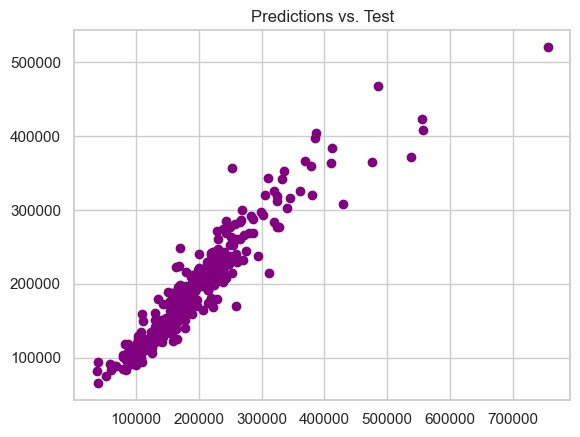

In [148]:
true_test, true_pred = np.exp(y_test), np.exp(y_pred_forest)
plt.scatter(true_test, true_pred, c="purple")
plt.title("Predictions vs. Test")
plt.show()

Our predictions maintain a fairly tight linear relationship with the actual ```SalePrice``` label right up until about $300k. Afterwards, predictions become less accurate.

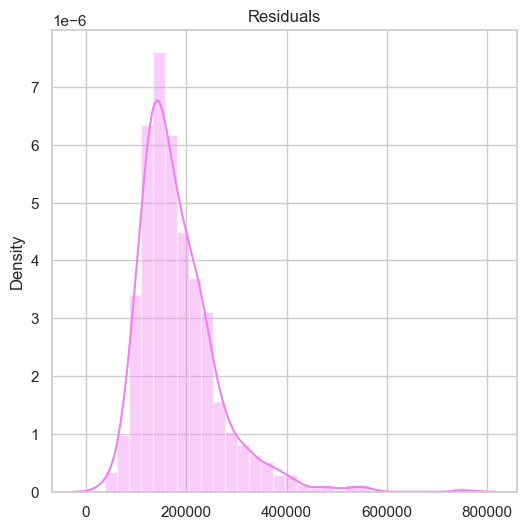

In [159]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.distplot((true_test, true_pred), bins=30, color='violet', ax=ax)
plt.title('Residuals')
plt.show()